# Data Acquisition & Cleaning
Author: Brian Tam, 9/27/2020

This notebook serves to output a single dataframe with alkl the necessary features to run a linear regression model.

### Table of Contents

I. [Data Acquisition](#data_acquisition)
* [Scraping the main page with Beautiful Soup](#scraping_bgg)
---

In [56]:
import pandas as pd
import numpy as np

#for scrapping
import requests
import time
from bs4 import BeautifulSoup

<h2><a id='data_acquisition'>I. Data Acquisition</a></h2>
<h3><a id='scraping_bgg'>Scraping the main page with Beautiful Soup</a></h3>

In [4]:
"""
Contains utility functions necessary to scape BoardGameGeek data
Author: Brian Tam (September 27, 2020)
"""
def scrape_BGG(up_to_this_page):
    """
    Uses BeautifulSoup to access the main page [https://boardgamegeek.com/browse/boardgame] 
    and scrapes the game ID #'s 100 games at a time.
    
    :param int up_to_this_page: Scraps from the first page till this page.
    """
    rank = []
    game_id = []
    game_num = [] 
    names = []
    year = []
    geek_rating = []
    avg_rating = []
    num_votes = []
    
    # Input # pages I want to scrape through

    for pagenum in range(1,up_to_this_page+1):
        #Activate pageturner to iterate through 100 baordgames per page
        htmlp = 'https://boardgamegeek.com/browse/boardgame/page/'+str(pagenum)
        response = requests.get(htmlp)
        page = response.text
    
        #remove some of the html notation by turning into soup
        soup = BeautifulSoup(page, 'lxml')
        
        for tr in soup.find_all('tr', id='row_'):
            rank.append(tr.find('td', class_='collection_rank').text.replace('\t','').replace('\n',''))
            game_id.append(tr.find_all('a')[1].attrs['href'])
            game_num.append(tr.find_all('a')[1].attrs['href'].split('/')[2])
            names.append(tr.find_all('td')[2].find('a').text)
            try: 
                year.append(tr.find_all('td')[2].find('span').text.strip('()')) 
            except AttributeError:
                year.append(np.nan)
            geek_rating.append(tr.find_all('td', class_="collection_bggrating")[0].text.replace('\t','').replace('\n',''))
            avg_rating.append(tr.find_all('td', class_="collection_bggrating")[1].text.replace('\t','').replace('\n',''))
            num_votes.append(tr.find_all('td', class_="collection_bggrating")[2].text.replace('\t','').replace('\n',''))
            time.sleep(.005)


    # Merge lists into one DataFrame


    BGG = pd.DataFrame({
        'rank': rank, 
        'game_id': game_id,
        'game_num': game_num,
        'names': names, 
        'year': year, 
        'geek_rating': geek_rating,
        'avg_rating': avg_rating,
        'num_votes': num_votes
        })

    return BGG 


In [ ]:
#With large page numbers, this function takes a while to run, so lets store it into a pickle and csv file
    BGG.to_pickle('Kick_BGG_DF.pkl')
    BGG.to_csv('Kick_BGG_DF')
      

In [ ]:
def scrape_BGG(up_to_this_page):
    '''
    All the columns of my DF created as empty lists

    '''
    rank = []
    game_id = []
    game_num = [] 
    names = []
    year = []
    geek_rating = []
    avg_rating = []
    num_votes = []
    '''
    Input # pages I want to scrape through

    '''
    for pagenum in range(1,up_to_this_page+1):
        #Activate pageturner to iterate through 100 baordgames per page
        htmlp = 'https://boardgamegeek.com/browse/boardgame/page/'+str(pagenum)
        response = requests.get(htmlp)
        page = response.text
    
        #remove some of the html notation by turning into soup
        soup = BeautifulSoup(page, 'lxml')
        
        for tr in soup.find_all('tr', id='row_'):
            rank.append(tr.find('td', class_='collection_rank').text.replace('\t','').replace('\n',''))
            game_id.append(tr.find_all('a')[1].attrs['href'])
            game_num.append(tr.find_all('a')[1].attrs['href'].split('/')[2])
            names.append(tr.find_all('td')[2].find('a').text)
            try: 
                year.append(tr.find_all('td')[2].find('span').text.strip('()')) 
            except AttributeError:
                year.append(np.nan)
            geek_rating.append(tr.find_all('td', class_="collection_bggrating")[0].text.replace('\t','').replace('\n',''))
            avg_rating.append(tr.find_all('td', class_="collection_bggrating")[1].text.replace('\t','').replace('\n',''))
            num_votes.append(tr.find_all('td', class_="collection_bggrating")[2].text.replace('\t','').replace('\n',''))
            time.sleep(.005)

    '''
    Merge lists into one DataFrame

    '''

    BGG = pd.DataFrame({
        'rank': rank, 
        'game_id': game_id,
        'game_num': game_num,
        'names': names, 
        'year': year, 
        'geek_rating': geek_rating,
        'avg_rating': avg_rating,
        'num_votes': num_votes
        })

    return BGG 

In [2]:
import pandas as pd

In [66]:
df_main_with_prices = pd.read_pickle('data/df_bgg_with_price.pkl')
df_more_stats = pd.read_pickle('data/df_more_stats.pkl')
df_more_prices = pd.read_pickle('data/df_more_prices.pkl')

In [67]:
df_boardgames = df_main_with_prices.merge(df_more_stats, left_index=True, right_index=True)
df_boardgames = df_boardgames.merge(df_more_prices, left_index=True, right_index=True)


In [68]:
df_boardgames[df_boardgames['game_num']==170959]

,Unnamed: 0,rank,game_id,game_num,names,year,geek_rating,avg_rating,num_votes,price_of_boardgame,...,supersaver,prime,title,defaultprice,newprice,listprice,url,sponsorurl,body,ggs
79902,79902,NaN,/boardgameexpansion/170959/descent-journeys-da...,170959,Descent: Journeys in the Dark (Second Edition)...,2014.0,5.883,7.9,330.0,30.96,...,None,None,Get Descent: Journeys in the Dark (Second Edit...,(unavailable),(unavailable),None,https://www.amazon.com/dp/1616619295?tag=itemt...,https://www.amazon.com/dp/1616619295?tag=itemt...,NaN,NaN


In [61]:
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 50)

In [71]:
df_boardgames.to_csv('df_final_.csv')
df_boardgames.to_pickle('df_final_.pkl')

In [69]:
df_boardgames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120832 entries, 0 to 120831
Data columns (total 41 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          120832 non-null  int64  
 1   rank                19535 non-null   float64
 2   game_id             120832 non-null  object 
 3   game_num            120832 non-null  int64  
 4   names               120832 non-null  object 
 5   year                111384 non-null  float64
 6   geek_rating         26561 non-null   float64
 7   avg_rating          91376 non-null   float64
 8   num_votes           91376 non-null   float64
 9   price_of_boardgame  7004 non-null    object 
 10  minplayers          120832 non-null  object 
 11  maxplayers          120832 non-null  object 
 12  avg_time            120832 non-null  object 
 13  age                 120832 non-null  object 
 14  honor               120832 non-null  object 
 15  mechanics           120832 non-nul

In [23]:
df_boardgames.columns

Index(['Unnamed: 0_x', 'Unnamed: 0.1', 'rank', 'game_id', 'game_num', 'names',
       'year', 'geek_rating', 'avg_rating', 'num_votes', 'price_of_boardgame',
       'Unnamed: 0_y', 'minplayers', 'maxplayers', 'avg_time', 'age', 'honor',
       'mechanics', 'mech_list', 'category', 'categ_list', 'owned', 'trading',
       'wanting', 'wishing', 'numcomments', 'numweights', 'averageweight',
       'kickstarted', 'podcasts'],
      dtype='object')

In [40]:
list(df_boardgames['game_num'][:5])

[174430, 161936, 224517, 167791, 233078]

In [62]:
pd.read_pickle('incomplete_prices_df.pkl')

,sponsorname,supersaver,prime,title,defaultprice,newprice,listprice,url,sponsorurl,body,ggs
0,Amazon.com,True,True,Get Gloomhaven on Amazon.com $100.88,$100.88,$100.88,$140.00,https://www.amazon.com/dp/B01LZXVN4P?tag=itemt...,https://www.amazon.com/dp/B01LZXVN4P?tag=itemt...,Eligible for Super Saver Shipping!,NaN
1,Geek Game Shop,NaN,NaN,Get Pandemic Legacy: Season 1 on the Geek Game...,$79.99,$79.99,NaN,https://geekgameshop.com/products/pandemic-leg...,https://geekgameshop.com,NaN,True
2,Amazon.com,True,True,Get Brass: Birmingham on Amazon.com $69.54,$69.54,$69.54,None,https://www.amazon.com/dp/1988884047?tag=itemt...,https://www.amazon.com/dp/1988884047?tag=itemt...,Eligible for Super Saver Shipping!,NaN
3,Amazon.com,True,True,Get Terraforming Mars on Amazon.com $41.99,$41.99,$41.99,$69.95,https://www.amazon.com/dp/B01GSYA4K2?tag=itemt...,https://www.amazon.com/dp/B01GSYA4K2?tag=itemt...,Eligible for Super Saver Shipping!,NaN
4,Amazon.com,True,True,Get Twilight Imperium (Fourth Edition) on Amaz...,$119.95,$119.95,$149.95,https://www.amazon.com/dp/B074YPSTRP?tag=itemt...,https://www.amazon.com/dp/B074YPSTRP?tag=itemt...,Eligible for Super Saver Shipping!,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3996,Amazon.com,False,False,Get Operation Dauntless: The Battles for Fonte...,$53.99,$53.99,None,https://www.amazon.com/dp/B01CH89QYI?tag=itemt...,https://www.amazon.com/dp/B01CH89QYI?tag=itemt...,NaN,NaN
3997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3998,Amazon.com,False,False,Get Guatemala Café on Amazon.com $60.00,$60.00,$60.00,None,https://www.amazon.com/dp/B000OCNVNW?tag=itemt...,https://www.amazon.com/dp/B000OCNVNW?tag=itemt...,NaN,NaN
3999,Amazon.com,True,True,Get Archmage on Amazon.com $47.00,$47.00,$47.00,$50.00,https://www.amazon.com/dp/B071KCXWQ3?tag=itemt...,https://www.amazon.com/dp/B071KCXWQ3?tag=itemt...,Eligible for Super Saver Shipping!,NaN


---
# Appendix

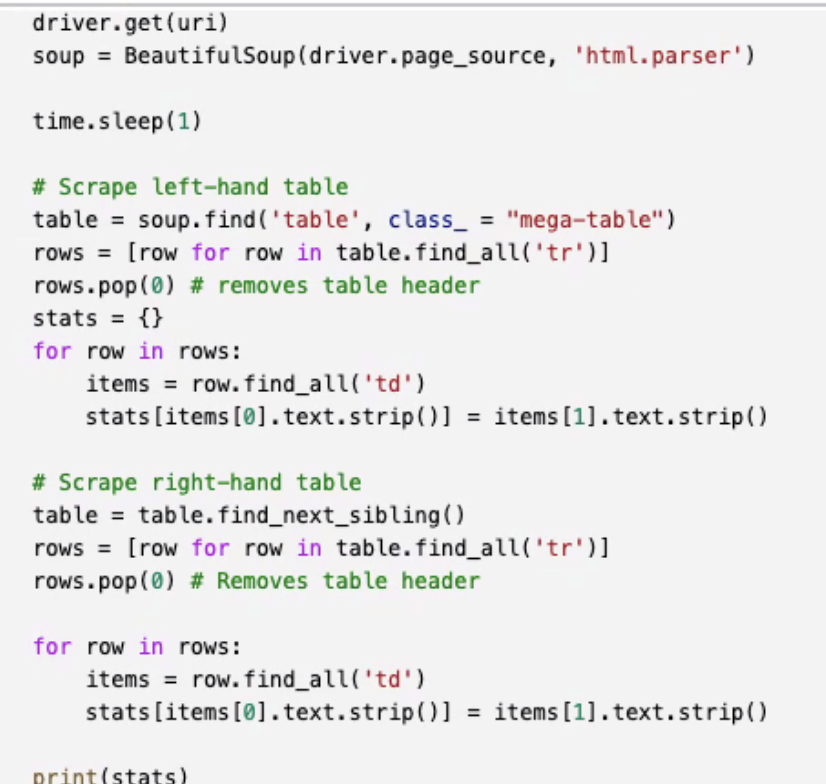

# Using Scrapy

In [ ]:
import re

from bs4 import BeautifulSoup

from scrapy.spiders import CrawlSpider
from scrapy.item import Item, Field


class Game(Item):
    id = Field()
    title = Field()
    geek_rate = Field()
    avg_rate = Field()
    num_votes = Field()

class GameSpider(CrawlSpider):
    name = 'boardgamegeek_spider'
    allowed_domains = ['boardgamegeek.com']
    start_urls = ['http://www.boardgamegeek.com/browse/boardgame']
    custom_settings = {'DOWNLOAD_DELAY': 1, 'BOT_NAME': 'Mr. Scraper Bot'}

    def parse(self, response):
        soup = BeautifulSoup(response.body, 'lxml')
        next_page = soup.select('a[title^="next"]')
        if next_page:
            next_page = next_page[0].get('href')
        if next_page:
            yield self.make_requests_from_url(response.urljoin(next_page))
        rows = soup.select('tr#row_')
        for row in rows:
            g = Game()
            a = row.find_all('a', href=re.compile('^/boardgame'))
            for r in a:
                if r.text:
                    g['id'] = r.get('href').split('/')[2]
                    g['title'] = r.text
            geek_rate, avg_rate, num_votes = row.select('td.collection_bggrating')
            g['geek_rate'] = geek_rate.text.strip()
            g['avg_rate'] = avg_rate.text.strip()
            g['num_votes'] = num_votes.text.strip()
            yield g
